In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
import numba 

import pickle
import corner

def reset_plt(ticksize,fontsize):
    plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.6
    
import matplotlib.pylab as pylab
#params = {'axes.titlesize':22}
#pylab.rcParams.update(params)

In [64]:
pickle_in = open("./data/OB5/OB5_3_peaks_XL_3.pkl","rb")
res2 = pickle.load(pickle_in)
flat = res2.flatchain#[int(5e5):]

flat = flat[440000:] #OB5_3 burnout first 5000

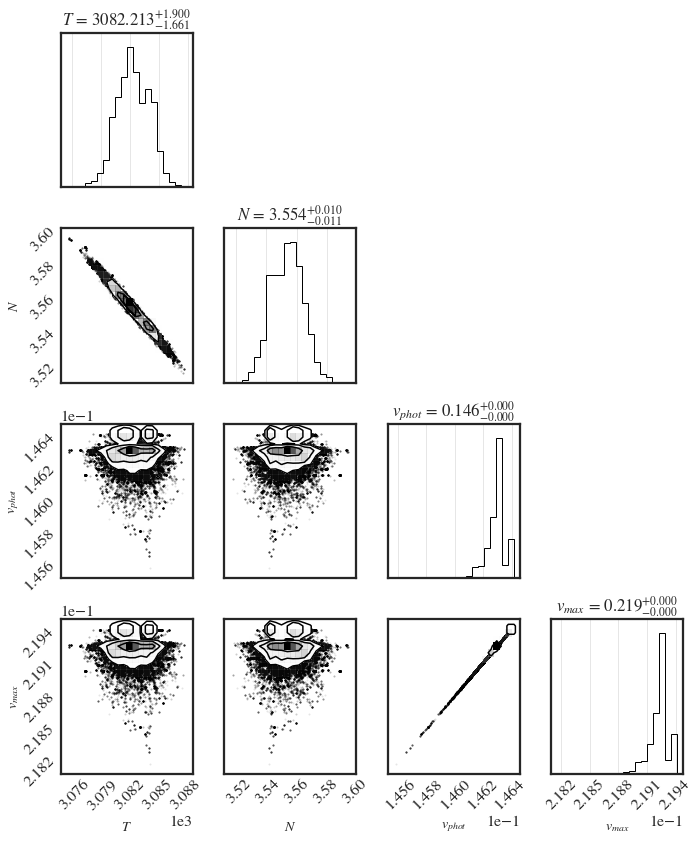

In [66]:
n_box = 4
fig,ax = plt.subplots(figsize=(10,12),nrows=n_box,ncols=n_box)
#ax = ax.flatten()
reset_plt(16, 14)
figure = corner.corner( np.array([flat['T'], flat['N']*1e29, flat['vphot'], flat['vmax']]).T, 
              labels=['$T$', '$N$', r'$v_{phot}$', r'$v_{max}$'], 
              show_titles=True, fig=fig, title_fmt = '.3f'); 
plt.tight_layout() 
axes = np.array(figure.axes).reshape((n_box, n_box))

#plt.savefig('Pictures/OB5_covariance_small.png', dpi=300)

In [67]:
### My Own Posterior Version

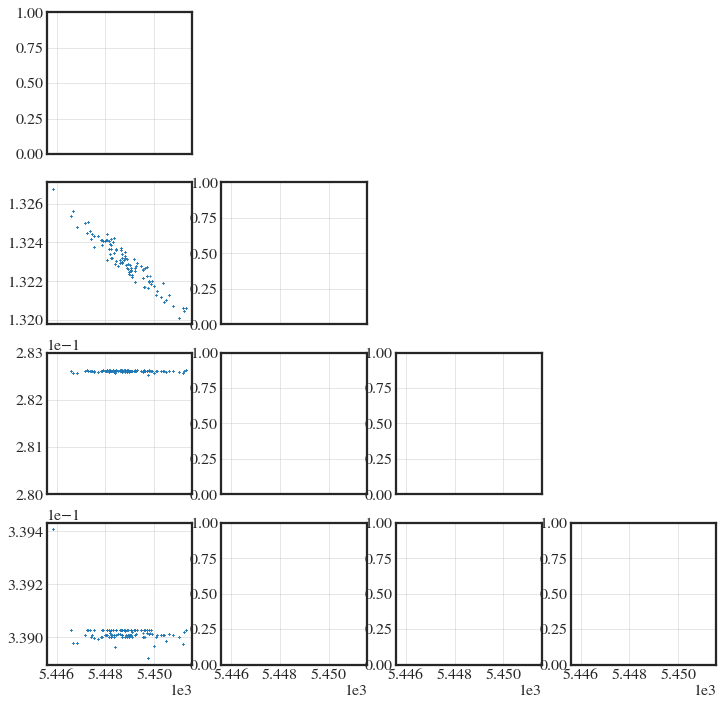

In [44]:
fig,ax = plt.subplots(figsize=(12,12),nrows=n_box,ncols=n_box, sharex=True)
ax[0,1].axis('off'), ax[0,2].axis('off'), ax[0,3].axis('off'), 
ax[1,2].axis('off'), ax[1,3].axis('off')
ax[2,3].axis('off')

ax[1,0].scatter(flat['T'][-2000:], flat['N'][-2000:]*1e29, s=0.1, alpha=1)
ax[2,0].scatter(flat['T'][-2000:], flat['vphot'][-2000:], s=0.1, alpha=1), ax[2,0].set_ylim(0.28, 0.283)
ax[3,0].scatter(flat['T'][-2000:], flat['vmax'][-2000:], s=0.1, alpha=1)
#ax[1,0].scatter(flat['T'][100:], flat['N'][100:]*1e29, s=0.1, alpha=0.1)

In [28]:
np.shape(flat)

(2000000, 11)

In [74]:
dir( res2 )

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_calculate_statistics',
 '_repr_html_',
 'aborted',
 'acceptance_fraction',
 'aic',
 'bic',
 'call_kws',
 'chain',
 'chisqr',
 'errorbars',
 'flatchain',
 'init_vals',
 'init_values',
 'lnprob',
 'method',
 'ndata',
 'nfev',
 'nfree',
 'nvarys',
 'params',
 'redchi',
 'residual',
 'show_candidates',
 'var_names']

In [80]:
res2.params

name,value,standard error,relative error,initial value,min,max,vary
T,5449.13210,1.27104706,(0.02%),5447.667793298019,2500.00000,7500.00000,True
N,1.3228e-29,1.3720e-32,(0.10%),1.323796510482438e-29,-inf,inf,True
vphot,0.28261118,3.2492e-04,(0.11%),0.27748049315364803,0.00000000,1.00000000,True
vmax,0.33902586,3.8623e-04,(0.11%),0.33866506716242817,0.00000000,1.00000000,True
t0,126000.000,,(0.11%),126000,-inf,inf,False
tau,2.15729048,0.47942493,(22.22%),2.226553928678608,0.00000000,100.000000,True
vref,0.00000000,,(22.22%),0.0,0.00000000,1.00000000,False
ve,0.26456568,0.03603613,(13.62%),0.22889163223768488,0.00000000,1.00000000,True
occult,0.00770568,0.00512084,(66.46%),0.0035476731178831224,0.00000000,2.00000000,True
amp1,0.23213462,0.00367977,(1.59%),0.2567428720093393,0.01000000,5.00000000,True


In [83]:
res2.show_candidates

<bound method MinimizerResult.show_candidates of <lmfit.minimizer.MinimizerResult object at 0x0000017E3DAF60A0>>

<AxesSubplot:xlabel='$v_{phot}$'>

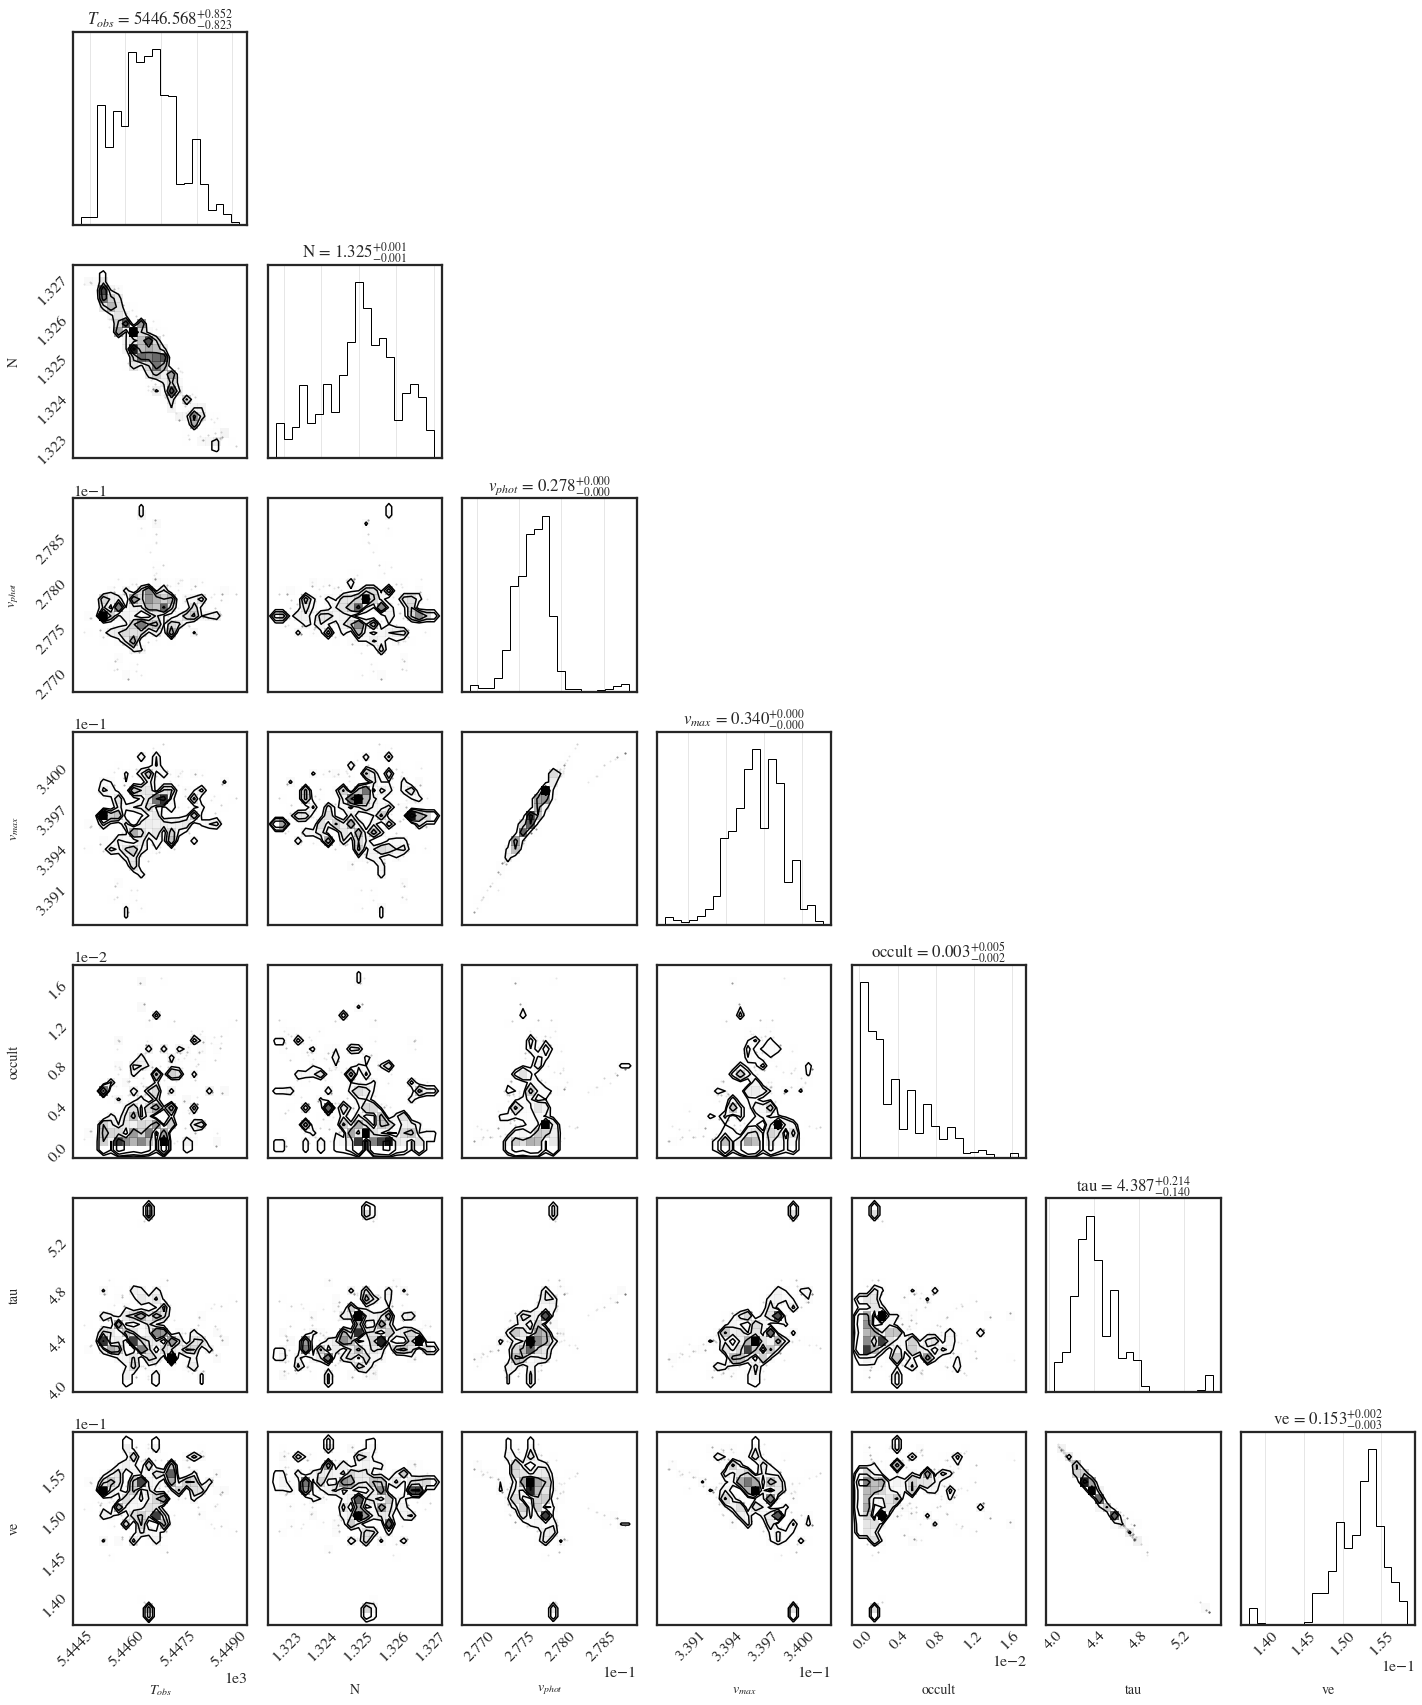

In [13]:
n_box = 7
fig,ax = plt.subplots(figsize=(20,24),nrows=n_box,ncols=n_box)
#ax = ax.flatten()
reset_plt(16, 14)
corner.corner( np.array([flat['T'], flat['N']*1e29, flat['vphot'], flat['vmax'], flat['occult'], flat['tau'], flat['ve']]).T, 
              labels=[r'$T_{eff}$', 'N', r'$v_{phot}$', r'$v_{max}$','Occult','$\tau$',r'$v_e$'], 
              show_titles=True, fig=fig, title_fmt = '.3f'); 
plt.tight_layout() 